In [11]:
import pandas as pd 
import matplotlib.pyplot as plt

In [10]:
!pip install matplotlib

  Using cached matplotlib-3.4.1-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached Pillow-8.2.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)


In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.shape

(284807, 31)

In [9]:
show_class = pd.value_counts(df['Class'], sort = False)

<AxesSubplot:>

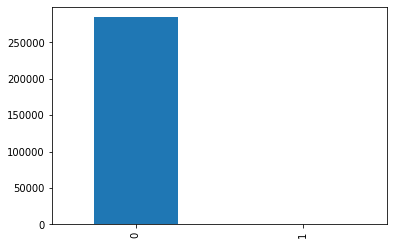

In [12]:
show_class.plot(kind='bar')

In [13]:
show_class

0    284315
1       492
Name: Class, dtype: int64

In [14]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64